In [1]:
%matplotlib inline
import sys
import os
sys.path.append('/home/kihyun/data/projects/kihyun/Editing-benchmark/cocoapi/PythonAPI')
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import json
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [35]:
dataDir='/home/kihyun/data/dataset/COCO2017'
dataType='train2017'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)
json_dir = '/home/kihyun/data/projects/kihyun/Editing-benchmark/edit_task_v2.json'
catnms = ['handbag', 'cake', 'chair'] # 해당 object가 모두 있는 이미지만 선택 및 프롬프트 저장
Annotation = False # Annotation mask를 이미지에 표시할지 여부
save_dir = './category_test' # 프롬프트 저장 위치
save_img = True
img_num = 30

In [36]:
cat_dir = '_'.join(catnms) # 프롬프트 저장 위치
save_path = os.path.join(save_dir, cat_dir)
if not os.path.exists(save_path):
        os.makedirs(save_path)

In [37]:
# initialize COCO api for instance annotations
# annotation file을 읽어서 COCO object를 생성
coco=COCO(annFile)

loading annotations into memory...
Done (t=14.07s)
creating index...
index created!


In [38]:
def img_idx_list(coco, catnms): # catnms = ['person', 'dog'] 에 해당하는 이미지들의 id를 반환
    catIds = coco.getCatIds(catNms=catnms)
    imgIds = coco.getImgIds(catIds=catIds)
    print("Number of images containing all of the categories: ", len(imgIds))
    return len(imgIds), imgIds

def img_show(coco, imgId, mask=False, catnms=None, save_path=save_path, save = save_img):
    img = coco.loadImgs(imgId)[0]
    I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
    #I = io.imread(img['coco_url'])
    plt.axis('off')
    plt.imshow(I)
    if mask:
        catIds = coco.getCatIds(catNms=catnms)
        annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
        anns = coco.loadAnns(annIds)
        coco.showAnns(anns)
    if save:
        # save image
        save_name = f'{imgId}.jpg'
        img_path = os.path.join(save_path, save_name)
        plt.savefig(img_path)
    
def multi_img_show(coco, imgId_ls, mask=False, catnms=None, save_num = img_num):
    i = 0
    print(f'Number of images downloaded: {save_num}')
    for imgId in imgId_ls:
        if i == save_num:
            break
        img_show(coco, imgId, mask, catnms)
        i += 1
        
def save_edit_prompts(catnms, json_dir, save_path=save_path):
    # read json file
    with open(json_dir, 'r') as f:
        json_data = json.load(f)
    # save edit prompts in prompt_save_dir
   
    file_name = f'edit_prompts_{catnms}.txt'
    txt_path = os.path.join(save_path, file_name)
    ff = open(txt_path, 'w')
    for cat in catnms:
        for edit_task in json_data[cat].keys():
            for subtask in json_data[cat][edit_task]['to']:
                ff.write(f'{cat}, {edit_task}, {subtask}\n')
                ff.write('---------------------\n')
    ff.close()
    
def show_cat_imgs_n_prompt(coco, catnms, json_dir):
    n, imgId_ls = img_idx_list(coco, catnms)
    multi_img_show(coco, imgId_ls, mask=Annotation, catnms=catnms)
    save_edit_prompts(catnms, json_dir)

Number of images containing all of the categories:  34
Number of images downloaded: 30


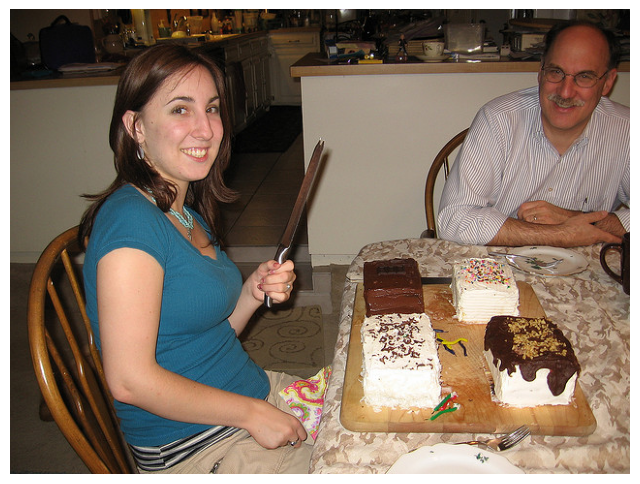

In [39]:
show_cat_imgs_n_prompt(coco, catnms, json_dir)